In [15]:
import numpy as np
from functools import partial

from laws.poisson_law import generate_poisson_law, poisson_probability
from laws.exponential_law import generate_exponential_law
from general_stats import perform_chi2_test

import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [16]:
N = 300
lamb = 5

(49.84333363562668, 9)


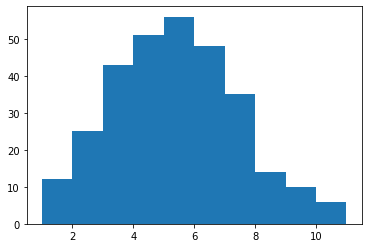

In [17]:
poisson_values = generate_poisson_law(lamb, N)
chi2, empirical_values, expected_values, bins = perform_chi2_test(poisson_values, partial(poisson_probability, lamb))
print(chi2)

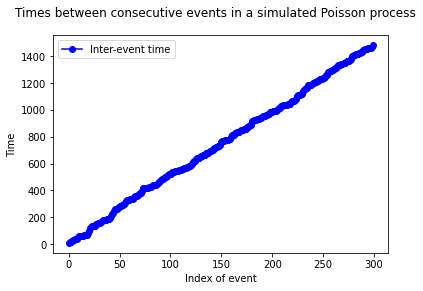

In [19]:
U = np.random.uniform(size=N)

lamb = 1/5
exponential_values = generate_exponential_law(lamb, U)

def poisson_generation(exponential_values):
    # begin à t = 0
    event_time = 0

    event_times = []
    event_num = []

    for i, exponential_value in enumerate(exponential_values):
        event_num.append(i)
        event_time += exponential_value
        event_times.append(event_time)
    
    return event_time, event_times, event_num

event_time, event_times, event_num = poisson_generation(exponential_values)

fig = plt.figure()
fig.suptitle('Times between consecutive events in a simulated Poisson process')
plot, = plt.plot(event_num, event_times, 'bo-', label='Absolute time of event')
plt.legend(handles=[plot])
plt.xlabel('Index of event')
plt.ylabel('Time')
plt.show()

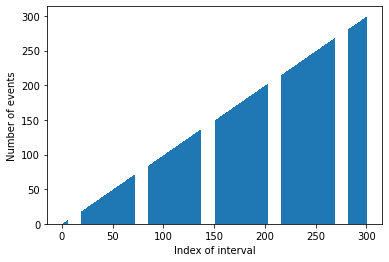

In [20]:
def zz(event_times):
    interval_nums = []
    num_events_in_interval = []

    interval_num = 1

    num_events = 0

    for i, event_time in enumerate(event_times):
        if event_time <= interval_num:
            num_events += 1
        else:
            interval_nums.append(interval_num)
            num_events_in_interval.append(num_events)
            interval_num += 1
            num_events += 1
    
    return interval_nums, num_events_in_interval

interval_nums, num_events_in_interval = zz(event_times)

fig = plt.figure()
plt.bar(interval_nums, num_events_in_interval)
plt.xlabel('Index of interval')
plt.ylabel('Number of events')
plt.show()